# Ensemble Techniques: Bagging, Boosting, and Stacking

Ensemble techniques combine multiple machine learning models to improve performance, increase robustness, and reduce the likelihood of overfitting. By leveraging the strengths of different models, ensemble methods can deliver better predictive performance than individual models. In this guide, we'll explore three popular ensemble techniques: **Bagging**, **Boosting**, and **Stacking**. We'll also touch on specific implementations such as **Random Forest Regressor** (Bagging) and **Gradient Boosting Regressor** (Boosting).

## 1. Bagging (Bootstrap Aggregating)

### Overview
Bagging, or Bootstrap Aggregating, is an ensemble technique that builds multiple models (often the same type) on different subsets of the training data. The subsets are created by randomly sampling the data with replacement. The final prediction is made by aggregating the predictions of the individual models (e.g., by averaging for regression or voting for classification).

One of the most popular implementations of Bagging is the **Random Forest**, where multiple decision trees are trained on different subsets of the data, and their predictions are averaged for the final output.

### Key Characteristics
- **Model Independence**: Each model in the ensemble is trained independently on a different subset of the data.
- **Reduces Variance**: Bagging reduces the variance of the model, making it more robust to overfitting.
- **Parallelization**: Since each model is trained independently, Bagging is easy to parallelize.

### Example: Random Forest Regressor

**Random Forest** is a type of Bagging method where each decision tree is trained on a bootstrapped subset of the data, and each tree selects a random subset of features to split at each node.

#### Key Points:
- **Bagging Type**: Each decision tree is an individual learner, and their results are aggregated.
- **Strength**: Reduces variance and is less prone to overfitting compared to individual decision trees.
- **Limitation**: May not perform well when the underlying relationship in the data is very complex.

---

## 2. Boosting

### Overview
Boosting is an iterative ensemble technique that adjusts the model based on the errors made by previous models. In Boosting, each model is trained to correct the errors of its predecessor. Models are built sequentially, with each new model focusing more on the difficult cases. The goal of Boosting is to convert weak learners (e.g., shallow decision trees) into strong learners.

**Gradient Boosting** is one of the most widely used Boosting techniques, and its variant, **XGBoost**, is known for its efficiency and accuracy.

### Key Characteristics
- **Sequential Learning**: Models are trained in sequence, with each model correcting the mistakes of the previous one.
- **Focus on Errors**: Each subsequent model focuses more on the observations that previous models misclassified or predicted poorly.
- **Reduces Bias**: Boosting reduces bias and improves the overall accuracy of the model.
  
### Example: Gradient Boosting Regressor

In **Gradient Boosting**, each new model minimizes a loss function by adjusting the previous model's errors. This process is repeated, adding more models to improve the accuracy iteratively.

#### Key Points:
- **Boosting Type**: Models are built sequentially, and each new model corrects the errors of the previous one.
- **Strength**: Effective for both classification and regression tasks, especially with complex relationships.
- **Limitation**: Can be prone to overfitting if the number of models or the learning rate is not tuned properly.

---

## 3. Stacking

### Overview
Stacking is an ensemble technique that combines predictions from multiple models (of different types) and trains a meta-model to make the final predictions based on these predictions. Unlike Bagging and Boosting, Stacking uses a diverse set of base models (e.g., decision trees, linear models, and neural networks) and aggregates their predictions via a meta-model.

In Stacking, the base models are trained on the original data, and the meta-model is trained on the predictions made by the base models.

### Key Characteristics
- **Heterogeneous Models**: Stacking allows different types of models to be used as base learners.
- **Meta-Learner**: A final model (meta-model) is trained to make predictions based on the outputs of the base models.
- **Flexibility**: Stacking can leverage the strengths of different models (e.g., decision trees, linear models) and combine them for better performance.

### Example: Stacking Regressor

A **Stacking Regressor** combines the predictions of multiple base regressors (e.g., Random Forest, Gradient Boosting) and uses a meta-regressor (e.g., linear regression) to make the final prediction.

#### Key Points:
- **Stacking Type**: Uses different types of models (heterogeneous) and combines their outputs.
- **Strength**: Can improve performance by combining the strengths of different models.
- **Limitation**: More computationally expensive and complex compared to Bagging and Boosting.

---

## Conclusion

- **Bagging (e.g., Random Forest)** reduces variance by training models independently on bootstrapped datasets and combining their results. It is particularly effective in reducing overfitting for high-variance models like decision trees.
- **Boosting (e.g., Gradient Boosting)** reduces bias by sequentially building models that correct the errors of previous models, leading to strong performance for complex tasks.
- **Stacking** combines the strengths of different types of models by training a meta-model that aggregates their predictions. It is a powerful ensemble technique but more complex to implement.

By using these ensemble methods, you can significantly improve the performance and robustness of your regression models.


# Scaling Data: When and What to Scale

### Overview
In machine learning, **scaling** is a crucial preprocessing step, especially when your model relies on distance calculations or gradient-based optimizations. Scaling ensures that features contribute equally to the model, preventing some features with large values from dominating others. However, not all models and features require scaling. Below is a guide to when and what to scale before passing data to your model.

---

## When Should You Scale the Data?

1. **Algorithms Sensitive to Feature Scaling**:
   Some models assume that the features are on a similar scale and rely on distance-based calculations or gradient descent optimization. Scaling is especially important for the following models:
   - **Linear Regression**: Assumes all features contribute equally to the output.
   - **Logistic Regression**: Affected by feature scale when making predictions.
   - **Support Vector Machines (SVM)**: Sensitive to feature scales as it optimizes the margin.
   - **K-Nearest Neighbors (KNN)**: Measures distances between data points.
   - **Neural Networks**: Gradient descent works better with scaled data.
   - **Principal Component Analysis (PCA)**: Sensitive to the variances of features.
   - **Regularized Regression (Ridge, Lasso)**: Regularization terms rely on coefficients' magnitude.

   **Scaling is not strictly necessary for models based on tree algorithms like:**

   - **Decision Trees**
   - **Random Forests**
   - **Gradient Boosting (XGBoost, LightGBM)**

2. **When Features Have Different Units**:
   If the features have different units (e.g., house size in square feet, price in dollars), scaling is needed so that no feature disproportionately influences the model due to its larger values.

3. **When Using Gradient Descent**:
   Models that optimize using gradient descent (e.g., neural networks) perform better and converge faster when features are scaled, as it prevents one feature from affecting the optimization process more than others.

---

## What Features Should Be Scaled?

1. **Continuous Numerical Features**:
   - Continuous features should be scaled, especially if their ranges differ significantly. Examples from a housing dataset could include:
     - `sqft_living` (size of the house in square feet)
     - `sqft_lot` (size of the lot in square feet)
     - `bathrooms` (number of bathrooms)
     - `floors` (number of floors)
     - `sqft_above` (living area above ground)
     - `sqft_basement` (basement area)
     - `lat` and `long` (geographical coordinates)

   **Common scaling methods**:
   - **Standardization** (Z-score normalization): Centers data with a mean of 0 and standard deviation of 1. It’s useful when features follow a normal distribution.
     - Formula: 
     $$ z = \frac{x - \mu}{\sigma} $$
   - **Min-Max Scaling**: Rescales the data to a range [0, 1]. It’s used when you want to scale all features to a bounded range.
     - Formula:
     $$ x' = \frac{x - x_{min}}{x_{max} - x_{min}} $$

2. **Features That Should **Not** Be Scaled**:
   - **Categorical Features**: Categorical features like `zipcode`, `view`, `condition` (when encoded as integers) do not need scaling because they represent categories or rankings rather than quantities.
   - **Binary Features**: Binary features (e.g., `waterfront` = 0 or 1) typically don’t require scaling, as their values are already bounded.

---

## Examples from the Housing Dataset

### Features That Should Be Scaled:
- `sqft_living`: Size of the house in square feet.
- `sqft_lot`: Size of the lot in square feet.
- `bathrooms`: Continuous values.
- `floors`: Continuous values.
- `sqft_above`, `sqft_basement`: Living areas.
- `lat`, `long`: Latitude and longitude coordinates.
- `sqft_living15`, `sqft_lot15`: Size of nearby homes and their lots.

### Features That Should Not Be Scaled:
- **Categorical or Binary Features**: 
  - `waterfront`: Binary feature (0 or 1).
  - `view`: Ordinal feature (e.g., 0-4).
  - `condition`: Ordinal feature (e.g., 1-5).
  - `grade`: Ordinal feature (e.g., 1-13).
  - `zipcode`: Categorical, indicating the location of the property.

---

## Conclusion

When using machine learning models, it is essential to scale **continuous numerical features** to ensure that all features contribute equally to the model. However, categorical and binary features generally do not need scaling. Always consider the nature of your features and the model you're using when deciding whether to scale.


## Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


## Load and Prepare the Dataset

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Features to scale (continuous numerical variables)
features_to_scale = ['sqft_living', 'sqft_lot', 'bathrooms', 'floors', 'sqft_above', 
                     'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to the selected features
df_scaled = df.copy()  # Make a copy of the original dataframe
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the scaled dataframe's head (optional)
print(df_scaled.head())

# Example: Splitting data for training and testing
# Target variable
y = df_scaled['price']

# Features to use in the model (scaled and unscaled)
X = df_scaled.drop(columns=['price', 'date', 'id', 'yr_built', 'yr_renovated', 'zipcode'])  # Dropping columns like 'id' and 'date' that are not useful

# Train-test split (you can adjust test_size and random_state as needed)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now the data is ready to be passed into a model


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3  -1.447464    -0.979835   
1  6414100192  20141209T000000  538000.0         3   0.175607     0.533634   
2  5631500400  20150225T000000  180000.0         2  -1.447464    -1.426254   
3  2487200875  20141209T000000  604000.0         4   1.149449    -0.130550   
4  1954400510  20150218T000000  510000.0         3  -0.149007    -0.435422   

   sqft_lot    floors  waterfront  view  ...  grade  sqft_above  \
0 -0.228321 -0.915427           0     0  ...      7   -0.734708   
1 -0.189885  0.936506           0     0  ...      7    0.460841   
2 -0.123298 -0.915427           0     0  ...      6   -1.229834   
3 -0.244014 -0.915427           0     0  ...      7   -0.891699   
4 -0.169653 -0.915427           0     0  ...      8   -0.130895   

   sqft_basement  yr_built  yr_renovated  zipcode       lat      long  \
0      -0.658681      1955             0    98178 -0.35

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Linear Regression (Baseline)
Let's start with a simple linear regression model as a baseline.

In [7]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_linear = linear_model.predict(X_train_scaled)
y_test_pred_linear = linear_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
linear_r2_train = r2_score(y_train, y_train_pred_linear)
linear_r2_test = r2_score(y_test, y_test_pred_linear)
linear_mse_train = mean_squared_error(y_train, y_train_pred_linear)
linear_mse_test = mean_squared_error(y_test, y_test_pred_linear)

print(f"Linear Regression (Baseline):")
print(f"Training R-squared: {linear_r2_train:.4f}, Training MSE: {linear_mse_train:.4f}")
print(f"Testing R-squared: {linear_r2_test:.4f}, Testing MSE: {linear_mse_test:.4f}")

Linear Regression (Baseline):
Training R-squared: 0.6728, Training MSE: 42751389676.8568
Testing R-squared: 0.6816, Testing MSE: 48131003016.8944


## Polynomial Regression
Next, let's perform Polynomial Regression with different degrees.

In [8]:
# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")


Polynomial Regression:
Best Degree: 2
Training R-squared Scores: [0.8007990164091188, 0.8711467863730643, 0.9243331327968197]
Testing R-squared Scores: [0.7707478675557833, 0.513735031717411, -16651917290.895124]


## Polynomial Regression with Regularization
Now, let's perform Polynomial Regression with Regularization using Ridge, Lasso, and ElasticNet.

In [9]:
# Continue with degree of 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 50]

# Create and fit the Ridge, Lasso, and ElasticNet regression models with different alpha values
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []

lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []

elasticnet_models = []
elasticnet_r2_train_scores = []
elasticnet_r2_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)

    # Make predictions on training and testing data
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    ridge_r2_train = r2_score(y_train, y_train_pred)
    ridge_r2_test = r2_score(y_test, y_test_pred)

    ridge_r2_train_scores.append(ridge_r2_train)
    ridge_r2_test_scores.append(ridge_r2_test)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)

    # Make predictions on training and testing data
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    lasso_r2_train = r2_score(y_train, y_train_pred)
    lasso_r2_test = r2_score(y_test, y_test_pred)

    lasso_r2_train_scores.append(lasso_r2_train)
    lasso_r2_test_scores.append(lasso_r2_test)

    for l1_ratio in [0.2, 0.5, 0.7, 0.9]:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(X_train_poly, y_train)
        elasticnet_models.append(elasticnet_model)

        # Make predictions on training and testing data
        y_train_pred = elasticnet_model.predict(X_train_poly)
        y_test_pred = elasticnet_model.predict(X_test_poly)

        # Calculate R-squared for evaluation
        elasticnet_r2_train = r2_score(y_train, y_train_pred)
        elasticnet_r2_test = r2_score(y_test, y_test_pred)

        elasticnet_r2_train_scores.append(elasticnet_r2_train)
        elasticnet_r2_test_scores.append(elasticnet_r2_test)


d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.252e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.272e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.268e+14, tolerance: 2.259e

IndexError: list index out of range

In [12]:

# Find the best alpha and l1_ratio based on the testing R-squared score
best_alpha_ridge = alphas[np.argmax(ridge_r2_test_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_r2_test_scores)]
# best_alpha_elasticnet = alphas[np.argmax(elasticnet_r2_test_scores)]
# best_l1_ratio_elasticnet = [0.2, 0.5, 0.7, 0.9][np.argmax(elasticnet_r2_test_scores) % 4]

print(f"\nPolynomial Regression with Regularization:")
print(f"Best Alpha (Ridge): {best_alpha_ridge:.4f}")
print(f"Best Alpha (Lasso): {best_alpha_lasso:.4f}")
# print(f"Best Alpha (ElasticNet): {best_alpha_elasticnet:.4f}")
# print(f"Best l1_ratio (ElasticNet): {best_l1_ratio_elasticnet:.1f}")
print(f"Ridge Training R-squared Scores: {ridge_r2_train_scores}")
print(f"Ridge Testing R-squared Scores: {ridge_r2_test_scores}")
print(f"Lasso Training R-squared Scores: {lasso_r2_train_scores}")
print(f"Lasso Testing R-squared Scores: {lasso_r2_test_scores}")
# print(f"ElasticNet Training R-squared Scores: {elasticnet_r2_train_scores}")
# print(f"ElasticNet Testing R-squared Scores: {elasticnet_r2_test_scores}")


Polynomial Regression with Regularization:
Best Alpha (Ridge): 50.0000
Best Alpha (Lasso): 50.0000
Ridge Training R-squared Scores: [0.800799014972478, 0.8007989513974333, 0.8007934934737717, 0.8006129967536371, 0.7999768372621967, 0.7990200402467372]
Ridge Testing R-squared Scores: [0.7707480786605542, 0.7707489600188289, 0.770754420496244, 0.7707669166473565, 0.7720513061450965, 0.7730507321939935]
Lasso Training R-squared Scores: [0.8005929416113181, 0.8005929209707279, 0.8005927125200472, 0.8005907082049957, 0.8005381188730117, 0.7998615199139121]
Lasso Testing R-squared Scores: [0.7723871034013665, 0.7723873786651798, 0.7723901098348677, 0.772418157824163, 0.7725713258954195, 0.7729469134313612]


## Multivariable Regression
Now, let's perform Multivariable Regression using all available features.

In [13]:
# Create and fit the multivariable regression model
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_multi = multi_model.predict(X_train_scaled)
y_test_pred_multi = multi_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
multi_r2_train = r2_score(y_train, y_train_pred_multi)
multi_r2_test = r2_score(y_test, y_test_pred_multi)
multi_mse_train = mean_squared_error(y_train, y_train_pred_multi)
multi_mse_test = mean_squared_error(y_test, y_test_pred_multi)

print(f"\nMultivariable Regression:")
print(f"Training R-squared: {multi_r2_train:.4f}, Training MSE: {multi_mse_train:.4f}")
print(f"Testing R-squared: {multi_r2_test:.4f}, Testing MSE: {multi_mse_test:.4f}")


Multivariable Regression:
Training R-squared: 0.6728, Training MSE: 42751389676.8568
Testing R-squared: 0.6816, Testing MSE: 48131003016.8944


## Ensemble Methods - Random Forest Regression
Let's apply Ensemble Methods, specifically Random Forest Regression, to the dataset.

In [14]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
rf_r2_train = r2_score(y_train, y_train_pred_rf)
rf_r2_test = r2_score(y_test, y_test_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)

print(f"\nRandom Forest Regression:")
print(f"Training R-squared: {rf_r2_train:.4f}, Training MSE: {rf_mse_train:.4f}")
print(f"Testing R-squared: {rf_r2_test:.4f}, Testing MSE: {rf_mse_test:.4f}")


Random Forest Regression:
Training R-squared: 0.9829, Training MSE: 2235709038.9597
Testing R-squared: 0.8561, Testing MSE: 21752696024.1291


## XGBoost

In [15]:
# Create and fit the XGBoost regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
xgb_r2_train = r2_score(y_train, y_train_pred_xgb)
xgb_r2_test = r2_score(y_test, y_test_pred_xgb)
xgb_mse_train = mean_squared_error(y_train, y_train_pred_xgb)
xgb_mse_test = mean_squared_error(y_test, y_test_pred_xgb)

print(f"\nXGBoost Regression:")
print(f"Training R-squared: {xgb_r2_train:.4f}, Training MSE: {xgb_mse_train:.4f}")
print(f"Testing R-squared: {xgb_r2_test:.4f}, Testing MSE: {xgb_mse_test:.4f}")



XGBoost Regression:
Training R-squared: 0.9715, Training MSE: 3721720644.2736
Testing R-squared: 0.8552, Testing MSE: 21884047187.7521


## Visualization
You can visualize the R-squared scores for different models.

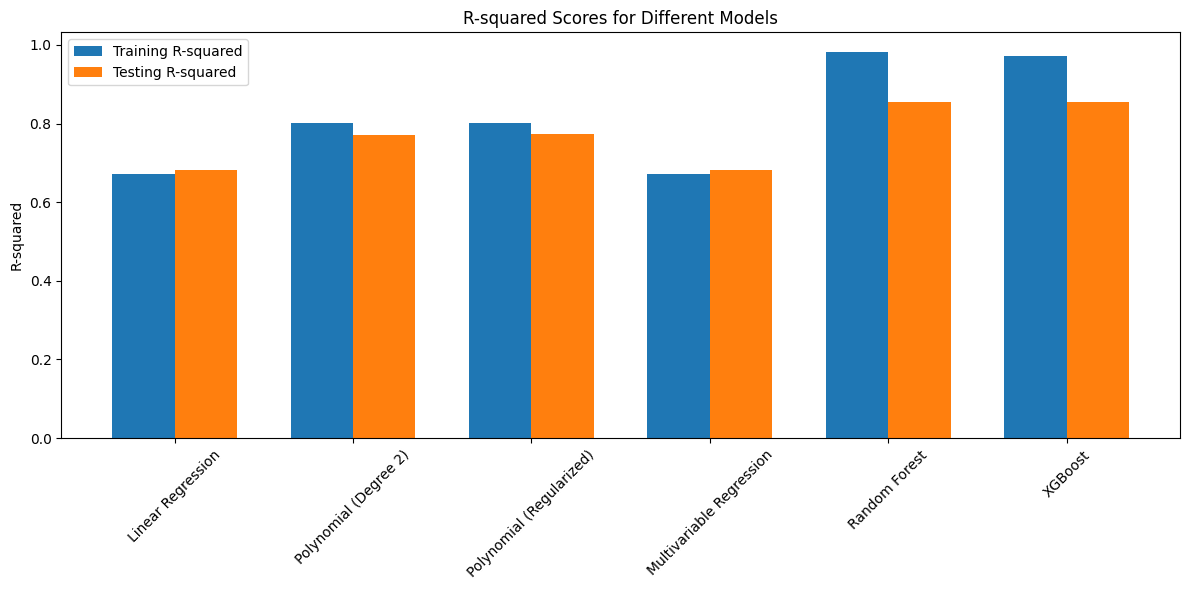

In [16]:
# Plotting R-squared scores for different models
plt.figure(figsize=(12, 6))

models = ['Linear Regression', f'Polynomial (Degree {best_degree})', 'Polynomial (Regularized)',
          'Multivariable Regression', 'Random Forest', 'XGBoost']

train_scores = [linear_r2_train, polynomial_r2_train_scores[np.argmax(polynomial_r2_test_scores)],
                max(ridge_r2_train_scores), multi_r2_train, rf_r2_train, xgb_r2_train]

test_scores = [linear_r2_test, polynomial_r2_test_scores[np.argmax(polynomial_r2_test_scores)],
               max(ridge_r2_test_scores), multi_r2_test, rf_r2_test, xgb_r2_test]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training R-squared')
plt.bar(x + width/2, test_scores, width, label='Testing R-squared')

plt.xticks(x, models, rotation=45)
plt.ylabel('R-squared')
plt.title('R-squared Scores for Different Models')
plt.legend()
plt.tight_layout()
plt.show()